**Part 1: importing and setting up dataset**

In [1]:
pip install pandas matplotlib seaborn scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd

# Load the dataset
file_path = 'INE.csv'  # Change the file path to your actual path
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
print(data.head())


      NutsID DICOFRE        region_name  year  edu_none  edu_basic  \
0  111160101  160101  Aboim das ChoÃ§as  2019        15         61   
1  111160101  160101  Aboim das ChoÃ§as  2009        30         57   
2  111160101  160101  Aboim das ChoÃ§as  1999        49         73   
3  111160101  160101  Aboim das ChoÃ§as  1989       167         97   
4  111160102  160102             AguiÃ£  2019        24         68   

   edu_secondary  edu_superior  labour_family  labour_holder  ...  olive_area  \
0             11             7             34             15  ...           0   
1              4             4             50             24  ...           0   
2              7             6             62             26  ...           0   
3              4             0            163             70  ...           0   
4              5             2             70             38  ...           1   

   vineyards_area  other_permanent_crop_area  fresh_fruit_holdings  \
0              12     

In [4]:
# Summary statistics for the dataset
summary_stats = data.describe()
print(summary_stats)

df_new = data
df_merged = df_new


               year      edu_none     edu_basic  edu_secondary  edu_superior  \
count  11528.000000  11528.000000  11528.000000    11528.00000  11528.000000   
mean    2004.000000    118.076856    204.742280       28.80465     15.493147   
std       11.180825    163.280984    206.063604       32.19049     19.082666   
min     1989.000000      0.000000      0.000000        0.00000      0.000000   
25%     1996.500000     23.000000     79.000000        9.00000      4.000000   
50%     2004.000000     61.000000    146.000000       19.00000      9.000000   
75%     2011.500000    149.000000    257.000000       37.00000     20.000000   
max     2019.000000   2088.000000   2381.000000      394.00000    212.000000   

       labour_family  labour_holder  labour_spouse  labour_other_family  \
count   11528.000000   11528.000000   11528.000000         11528.000000   
mean      135.850017      67.254511      43.840996            24.859386   
std       151.810015      70.284225      56.570835    

**Create a pivot table separating each variable of interest into year**

In [5]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df_merged is already loaded and organized

# Define socio-economic and agricultural activity numeric columns
socio_economic_cols = ['edu_none', 'edu_basic', 'edu_secondary', 'edu_superior',
                       'labour_family', 'labour_holder', 'labour_spouse',
                       'labour_other_family', 'labour_non_family',
                       'labour_regular', 'labour_non_regular', 'labour_not_hired']

agricultural_cols = ['grassland_area', 'grassland_holdings', 'cereals_area',
                     'dried_pulses_area', 'grasses_area', 'fodder_area', 'potatoes_area',
                     'sugarbeets_area', 'industrial_crops_area', 'fresh_veg_area',
                     'flowers_area', 'other_temp_crops_area', 'cereals_area.1',
                     'dried_pulses_area.1', 'grasses_area.1', 'fodder_area.1',
                     'potatoes_area.1', 'sugarbeets_area.1', 'industrial_crops_area.1',
                     'fresh_veg_area.1', 'flowers_area.1', 'other_temp_crops_area.1',
                     'fresh_fruit_area', 'citrus_area', 'fruit_area', 'nuts_area',
                     'olive_area', 'vineyards_area', 'other_permanent_crop_area',
                     'fresh_fruit_holdings', 'citrus_holdings', 'fruit_holdings',
                     'nuts_holdings', 'olive_holdings', 'vineyard_holdings',
                     'other_permanent_crop_holdings']

# Combine socio-economic and agricultural columns
combined_cols = socio_economic_cols + agricultural_cols

# Pivot the data so that each year is a separate column
df_pivoted = df_merged.pivot(index='NutsID', columns='year', values=combined_cols)

# Drop rows with any missing values to ensure PCA works correctly
df_pivoted = df_pivoted.dropna()

# Flatten the multi-index columns
df_pivoted.columns = ['{}_{}'.format(col[0], col[1]) for col in df_pivoted.columns]

df_pivoted.head()

,edu_none_1989,edu_none_1999,edu_none_2009,edu_none_2019,edu_basic_1989,edu_basic_1999,edu_basic_2009,edu_basic_2019,edu_secondary_1989,edu_secondary_1999,...,olive_holdings_2009,olive_holdings_2019,vineyard_holdings_1989,vineyard_holdings_1999,vineyard_holdings_2009,vineyard_holdings_2019,other_permanent_crop_holdings_1989,other_permanent_crop_holdings_1999,other_permanent_crop_holdings_2009,other_permanent_crop_holdings_2019
NutsID,,,,,,,,,,,,,,,,,,,,,
111160101,167,49,30,15,97,73,57,61,4,7,...,0,0,84,40,29,32,0,0,0,0
111160102,94,71,23,24,220,99,82,68,2,2,...,0,2,79,54,42,39,0,0,0,0
111160104,76,46,28,3,60,56,42,48,4,0,...,1,4,39,30,25,18,0,0,0,0
111160105,212,80,42,24,75,77,22,34,7,2,...,0,0,79,52,23,12,0,0,0,0
111160106,402,209,152,66,290,108,104,107,1,1,...,3,4,183,115,101,34,0,0,0,0


4. Exploratory Data Analysis (EDA)
For EDA, we'll create visualizations to understand the temporal trends and relationships.

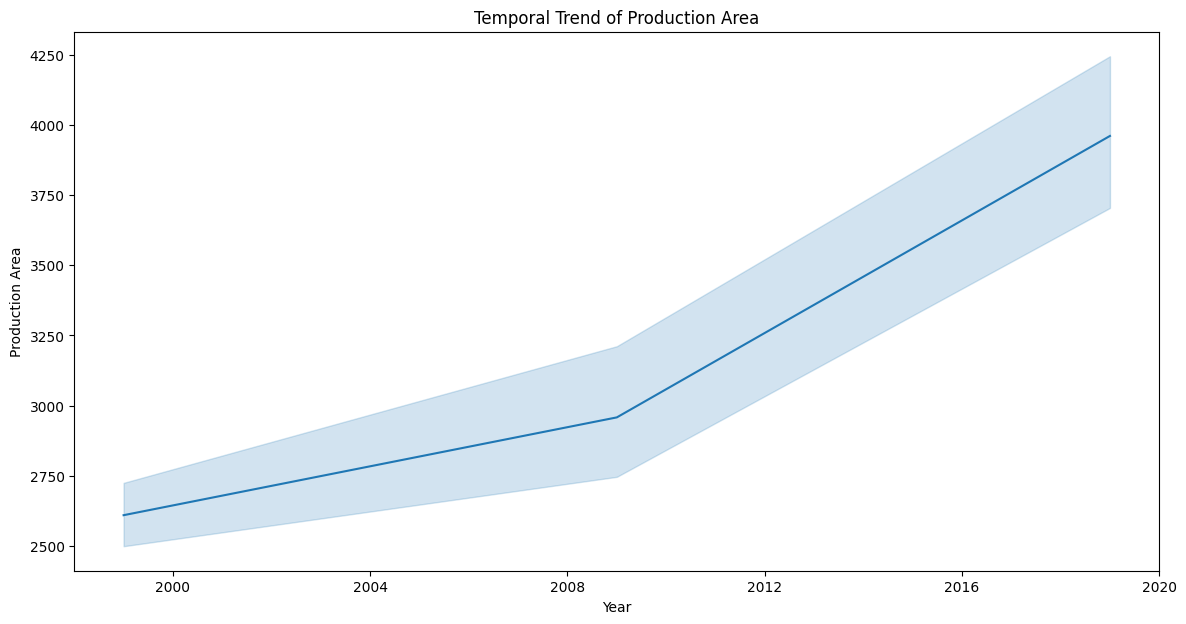

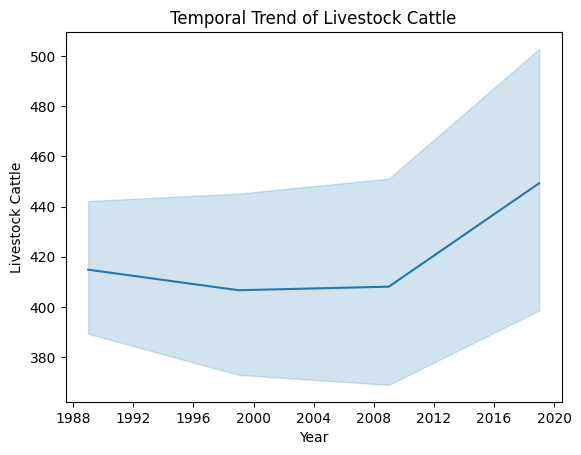

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert year to a datetime object if it's not already
data['year'] = pd.to_datetime(data['year'], format='%Y')

# Plotting temporal trends for selected variables
plt.figure(figsize=(14, 7))

# Example: Temporal trend for 'production_area'
sns.lineplot(data=data, x='year', y='production_area')
plt.title('Temporal Trend of Production Area')
plt.xlabel('Year')
plt.ylabel('Production Area')
plt.show()

# Example: Temporal trend for 'livestock_cattle'
sns.lineplot(data=data, x='year', y='livestock_cattle')
plt.title('Temporal Trend of Livestock Cattle')
plt.xlabel('Year')
plt.ylabel('Livestock Cattle')
plt.show()


acho que este proximo nao funciona porque a tabela tem valores 0 e em branco... .limpamos a tabela?

5. Inferential Statistics
We can perform inferential statistics using methods such as PCA to see the relationships between different variables over time.

/var/folders/nx/dr_pnkkn1yg156jk80s020sc0000gn/T/ipykernel_7729/716711682.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_economic.dropna(inplace=True)
/var/folders/nx/dr_pnkkn1yg156jk80s020sc0000gn/T/ipykernel_7729/716711682.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_agriculture.dropna(inplace=True)


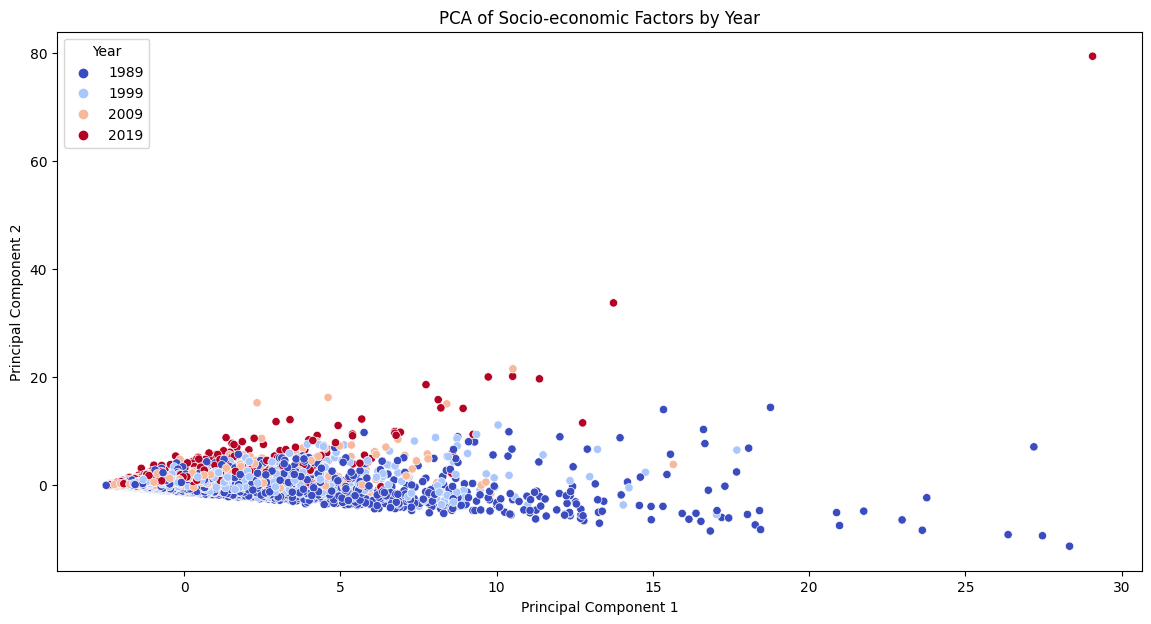

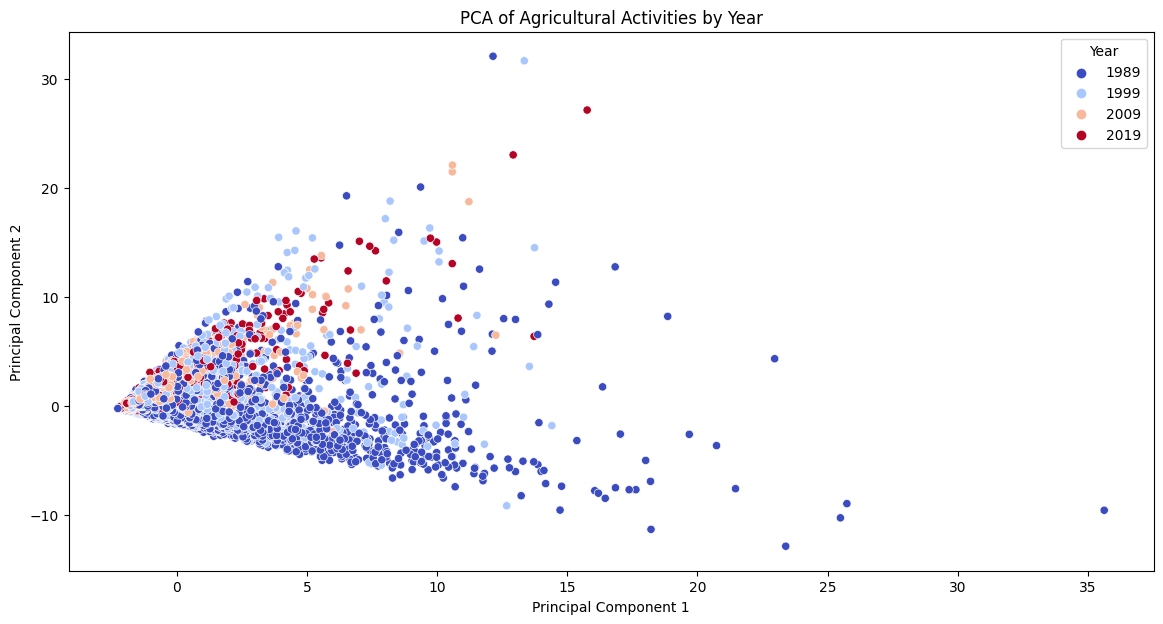

In [6]:
df_merged = df_new
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df_merged is already loaded and organized

# Identify relevant numerical columns for PCA in socio-economic factors
economic_numeric_cols = ['edu_none', 'edu_basic', 'edu_secondary', 'edu_superior',
                         'labour_family', 'labour_holder', 'labour_spouse',
                         'labour_other_family', 'labour_non_family',
                         'labour_regular', 'labour_non_regular', 'labour_not_hired']

# Extract socio-economic factor features and year column
X_economic = df_merged[economic_numeric_cols]
y_economic = df_merged['year']

# Identify relevant numerical columns for PCA in agricultural activities
agriculture_numeric_cols = ['grassland_area', 'grassland_holdings',
                             'cereals_area', 'dried_pulses_area', 'grasses_area', 'fodder_area',
                             'potatoes_area', 'sugarbeets_area', 'industrial_crops_area',
                             'fresh_veg_area', 'flowers_area', 'other_temp_crops_area',
                             'cereals_area.1', 'dried_pulses_area.1', 'grasses_area.1',
                             'fodder_area.1', 'potatoes_area.1', 'sugarbeets_area.1',
                             'industrial_crops_area.1', 'fresh_veg_area.1', 'flowers_area.1',
                             'other_temp_crops_area.1', 'fresh_fruit_area', 'citrus_area',
                             'fruit_area', 'nuts_area', 'olive_area', 'vineyards_area',
                             'other_permanent_crop_area', 'fresh_fruit_holdings', 'citrus_holdings',
                             'fruit_holdings', 'nuts_holdings', 'olive_holdings',
                             'vineyard_holdings', 'other_permanent_crop_holdings']

# Extract agricultural activity features and year column
X_agriculture = df_merged[agriculture_numeric_cols]
y_agriculture = df_merged['year']

# Drop rows containing NaN values for socio-economic factors
X_economic.dropna(inplace=True)

# Drop corresponding rows in y for socio-economic factors
y_economic = y_economic[X_economic.index]

# Drop rows containing NaN values for agricultural activities
X_agriculture.dropna(inplace=True)

# Drop corresponding rows in y for agricultural activities
y_agriculture = y_agriculture[X_agriculture.index]

# Standardize the data for socio-economic factors
scaler_economic = StandardScaler()
X_economic_scaled = scaler_economic.fit_transform(X_economic)

# Standardize the data for agricultural activities
scaler_agriculture = StandardScaler()
X_agriculture_scaled = scaler_agriculture.fit_transform(X_agriculture)

# PCA for socio-economic factors
pca_economic = PCA(n_components=2)
economic_principal_components = pca_economic.fit_transform(X_economic_scaled)
economic_pc_df = pd.DataFrame(data=economic_principal_components, columns=['PC1', 'PC2'])
economic_pc_df['Year'] = y_economic.values

# PCA for agricultural activities
pca_agriculture = PCA(n_components=2)
agriculture_principal_components = pca_agriculture.fit_transform(X_agriculture_scaled)
agriculture_pc_df = pd.DataFrame(data=agriculture_principal_components, columns=['PC1', 'PC2'])
agriculture_pc_df['Year'] = y_agriculture.values

# Plotting PCA results for socio-economic factors
plt.figure(figsize=(14, 7))
sns.scatterplot(x='PC1', y='PC2', hue='Year', palette='coolwarm', data=economic_pc_df)
plt.title('PCA of Socio-economic Factors by Year')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

# Plotting PCA results for agricultural activities
plt.figure(figsize=(14, 7))
sns.scatterplot(x='PC1', y='PC2', hue='Year', palette='coolwarm', data=agriculture_pc_df)
plt.title('PCA of Agricultural Activities by Year')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


6. Final Visualization Product and Storytelling
Finally, let's create a cohesive story using multiple visualizations

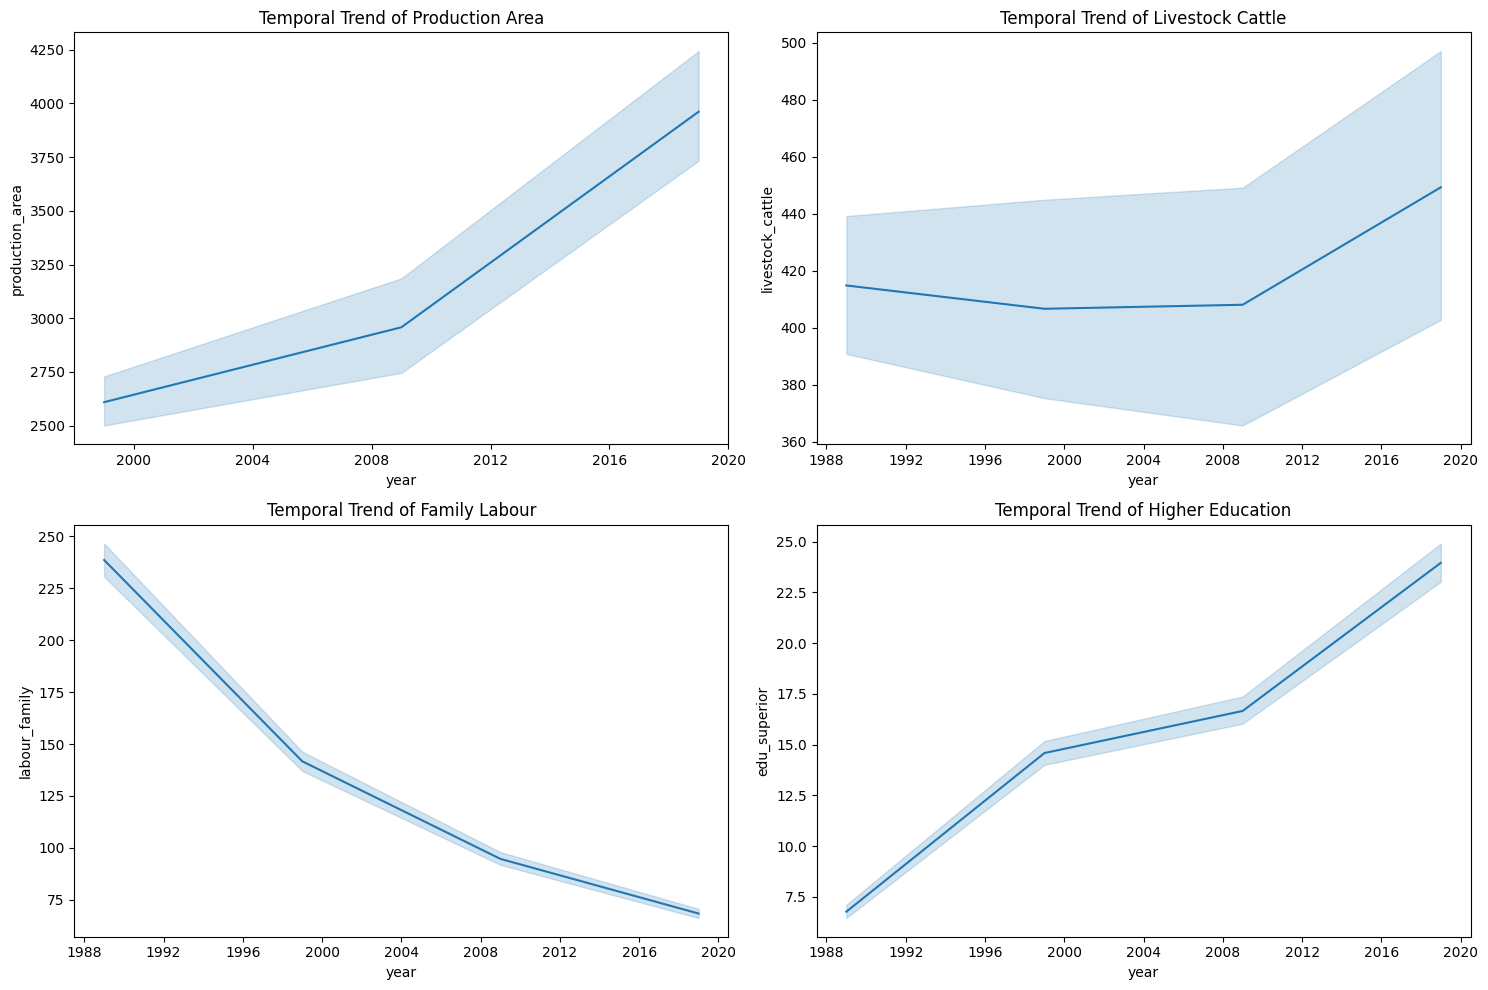

In [11]:
# Line plots for temporal trends
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

sns.lineplot(data=data, x='year', y='production_area', ax=axes[0, 0])
axes[0, 0].set_title('Temporal Trend of Production Area')

sns.lineplot(data=data, x='year', y='livestock_cattle', ax=axes[0, 1])
axes[0, 1].set_title('Temporal Trend of Livestock Cattle')

sns.lineplot(data=data, x='year', y='labour_family', ax=axes[1, 0])
axes[1, 0].set_title('Temporal Trend of Family Labour')

sns.lineplot(data=data, x='year', y='edu_superior', ax=axes[1, 1])
axes[1, 1].set_title('Temporal Trend of Higher Education')

plt.tight_layout()
plt.show()


To meet the objectives of exploring how agricultural practices have changed over time and how these changes relate to socio-economic indicators, you should consider the following steps:

Descriptive Analysis: Start with summary statistics to understand the central tendencies, dispersions, and distributions of your data over time.
Time Series Analysis: Perform time series analysis to detect trends and patterns over time.
Correlation and Regression Analysis: Use correlation and regression analysis to understand relationships between agricultural practices and socio-economic indicators.
Hypothesis Testing: Perform statistical tests to validate hypotheses about the relationships and changes over time.
Visualization: Use appropriate visualizations to illustrate trends, relationships, and significant findings.

1. Descriptive Analysis

In [15]:
# Summary statistics for each year
summary_stats = data.groupby(data['year'].dt.year).describe()
print(summary_stats)


      year                                                                 \
     count                 mean                  min                  25%   
year                                                                        
1989  2882  1989-01-01 00:00:00  1989-01-01 00:00:00  1989-01-01 00:00:00   
1999  2882  1999-01-01 00:00:00  1999-01-01 00:00:00  1999-01-01 00:00:00   
2009  2882  2009-01-01 00:00:00  2009-01-01 00:00:00  2009-01-01 00:00:00   
2019  2882  2019-01-01 00:00:00  2019-01-01 00:00:00  2019-01-01 00:00:00   

                                                                          \
                      50%                  75%                  max  std   
year                                                                       
1989  1989-01-01 00:00:00  1989-01-01 00:00:00  1989-01-01 00:00:00  NaN   
1999  1999-01-01 00:00:00  1999-01-01 00:00:00  1999-01-01 00:00:00  NaN   
2009  2009-01-01 00:00:00  2009-01-01 00:00:00  2009-01-01 00:00:00  NaN   
2019

2. Time Series Analysis

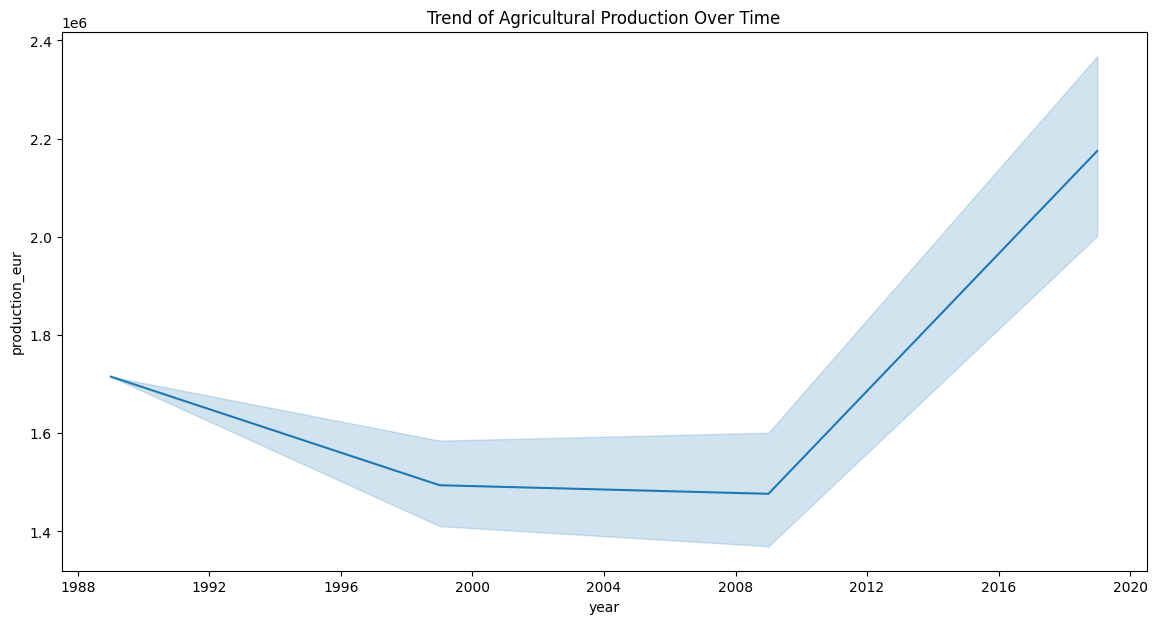

In [16]:
# Plotting trends over time for key agricultural practices
plt.figure(figsize=(14, 7))

# Example: Plot trends for 'production_eur'
sns.lineplot(data=data, x='year', y='production_eur')
plt.title('Trend of Agricultural Production Over Time')
plt.show()

# Repeat for other key variables as needed


3. Correlation and Regression Analysis

Coefficient: 75943.01934506759
Intercept: 301262.8008464286


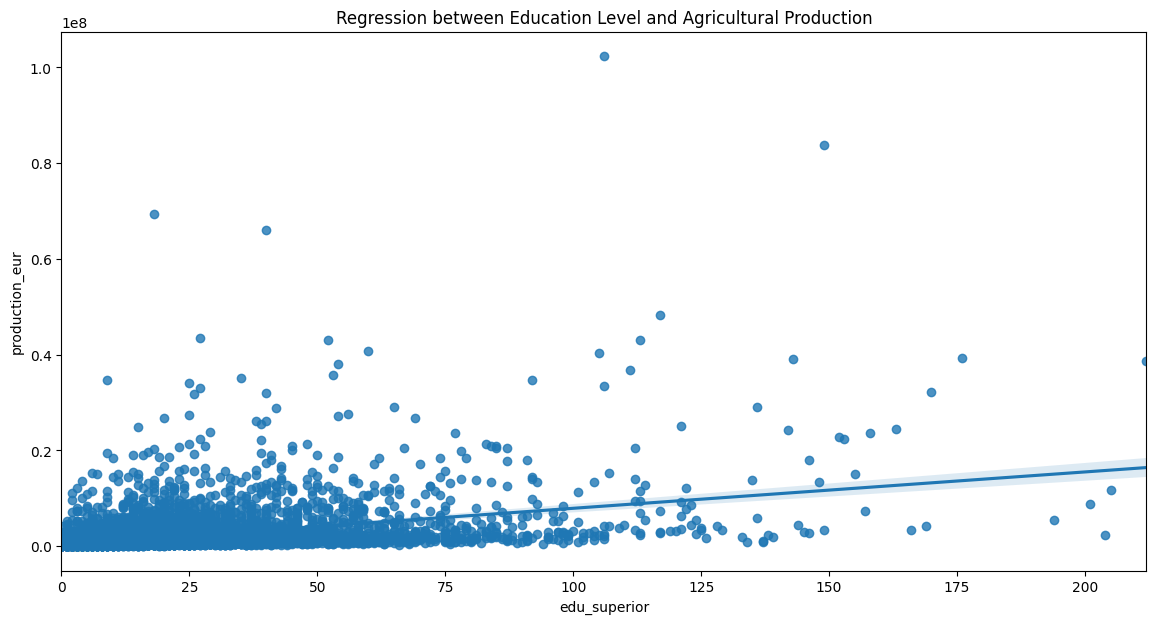

In [12]:
# Drop rows with NaN values in the target variable 'production_eur'
df_merged.dropna(subset=['production_eur'], inplace=True)

# Prepare the data
X = df_merged[['edu_superior']]
y = df_merged['production_eur']

# Fit the model
regressor = LinearRegression()
regressor.fit(X, y)

# Print coefficients
print(f"Coefficient: {regressor.coef_[0]}")
print(f"Intercept: {regressor.intercept_}")

# Plotting the regression
plt.figure(figsize=(14, 7))
sns.regplot(x='edu_superior', y='production_eur', data=df_merged)
plt.title('Regression between Education Level and Agricultural Production')
plt.show()


4. Hypothesis Testing
You can perform t-tests, ANOVA, or other statistical tests depending on your specific hypotheses.

In [19]:
from scipy.stats import ttest_ind, f_oneway

# Example: t-test for 'production_eur' between two different years
year1 = data[data['year'].dt.year == 2009]['production_eur']
year2 = data[data['year'].dt.year == 2019]['production_eur']

t_stat, p_value = ttest_ind(year1, year2)
print(f"T-statistic: {t_stat}, P-value: {p_value}")

# Example: ANOVA for 'production_eur' across multiple years
years = [2009, 2014, 2019]
groups = [data[data['year'].dt.year == year]['production_eur'] for year in years]

f_stat, p_value = f_oneway(*groups)
print(f"F-statistic: {f_stat}, P-value: {p_value}")


T-statistic: -6.321554219542467, P-value: 2.783855912427388e-10
F-statistic: nan, P-value: nan


5. Visualization
Use advanced visualizations to communicate findings effectively.

In [18]:
print(df_merged.columns)

Index(['NutsID', 'DICOFRE', 'region_name', 'year', 'edu_none', 'edu_basic',
       'edu_secondary', 'edu_superior', 'labour_family', 'labour_holder',
       'labour_spouse', 'labour_other_family', 'labour_non_family',
       'labour_regular', 'labour_non_regular', 'labour_not_hired',
       'production_eur', 'production_area', 'livestock_cattle',
       'livestock_pigs', 'livestock_sheep', 'livestock_goats',
       'livestock_equidae', 'livestock_poultry', 'livestock_rabbits',
       'livestock_hives', 'grassland_area', 'grassland_holdings',
       'cereals_area', 'dried_pulses_area', 'grasses_area', 'fodder_area',
       'potatoes_area', 'sugarbeets_area', 'industrial_crops_area',
       'fresh_veg_area', 'flowers_area', 'other_temp_crops_area',
       'cereals_area.1', 'dried_pulses_area.1', 'grasses_area.1',
       'fodder_area.1', 'potatoes_area.1', 'sugarbeets_area.1',
       'industrial_crops_area.1', 'fresh_veg_area.1', 'flowers_area.1',
       'other_temp_crops_area.1', 'fresh_

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_core.py:1225: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_core.py:1225: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_core.py:1225: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead



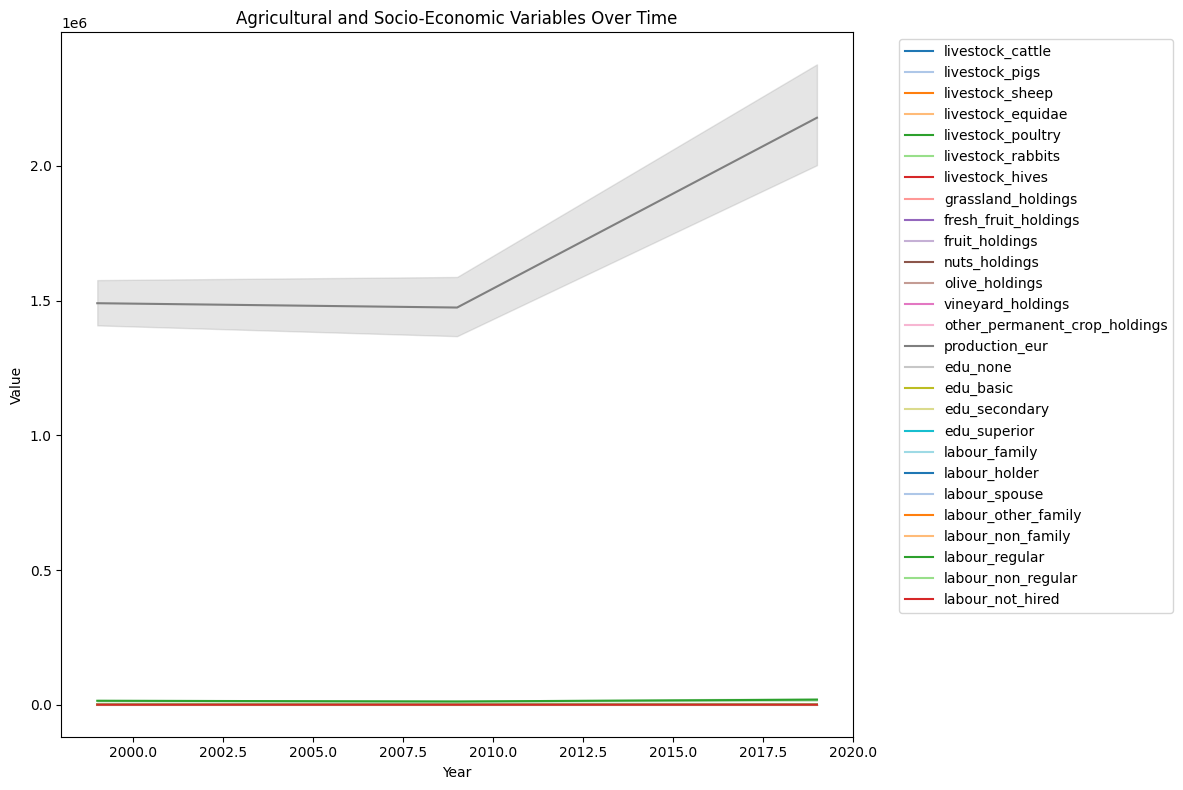

In [20]:
#don't love this but its a start

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Define the agricultural variables and socio-economic variables
agricultural_variables = ['livestock_cattle', 'livestock_pigs', 'livestock_sheep', 'livestock_equidae', 'livestock_poultry', 'livestock_rabbits', 'livestock_hives','grassland_holdings', 'fresh_fruit_holdings', 'fruit_holdings', 'nuts_holdings', 'olive_holdings', 'vineyard_holdings', 'other_permanent_crop_holdings']
socioeconomic_variables = ['production_eur', 'edu_none', 'edu_basic', 'edu_secondary', 'edu_superior', 'labour_family', 'labour_holder', 'labour_spouse', 'labour_other_family', 'labour_non_family', 'labour_regular', 'labour_non_regular', 'labour_not_hired']

# Combine all variables
all_variables = agricultural_variables + socioeconomic_variables

# Create a DataFrame with all the variables
data_all_variables = df_merged[['year'] + all_variables]

# Melt the DataFrame to long format
data_all_variables_melted = data_all_variables.melt(id_vars=['year'], var_name='Variable', value_name='Value')

# Plot using seaborn
plt.figure(figsize=(12, 8))
sns.lineplot(data=data_all_variables_melted, x='year', y='Value', hue='Variable', palette='tab20')
plt.title('Agricultural and Socio-Economic Variables Over Time')
plt.xlabel('Year')
plt.ylabel('Value')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


Conclusion
Combining these analyses and visualizations will help you explore how agricultural practices have changed over time and how these changes relate to socio-economic indicators. You should interpret the results from statistical tests and visualizations to draw meaningful conclusions and support your storytelling with the data.